# Requirements

In [2]:
# Add as many imports as you need.
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [6]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('spotify_songs.csv')
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.0724,NaN,0.3570,0.693,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.0794,NaN,0.1100,0.613,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,pop


Preprocess the input and the output variables appropriately.

In [8]:
# Write your code here. Add as many boxes as you need.

Explore the dataset using visualizations of your choice.

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>]], dtype=object)

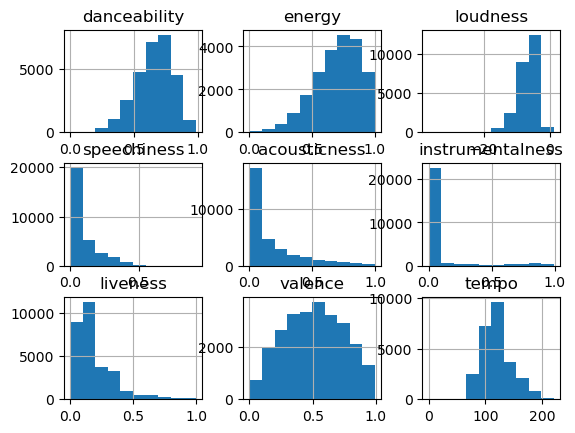

In [10]:
# Write your code here. Add as many boxes as you need.
data.hist()

Check if the dataset is balanced.

In [12]:
# Write your code here. Add as many boxes as you need.
data['genre'].value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [14]:
# Write your code here. Add as many boxes as you need.
data.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

In [15]:
data.isnull().sum() / len(data) * 100

danceability        11.153413
energy              34.297810
loudness            23.208357
speechiness          7.190936
acousticness         2.722870
instrumentalness    19.705784
liveness             9.094509
valence             22.809369
tempo               19.970761
genre                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

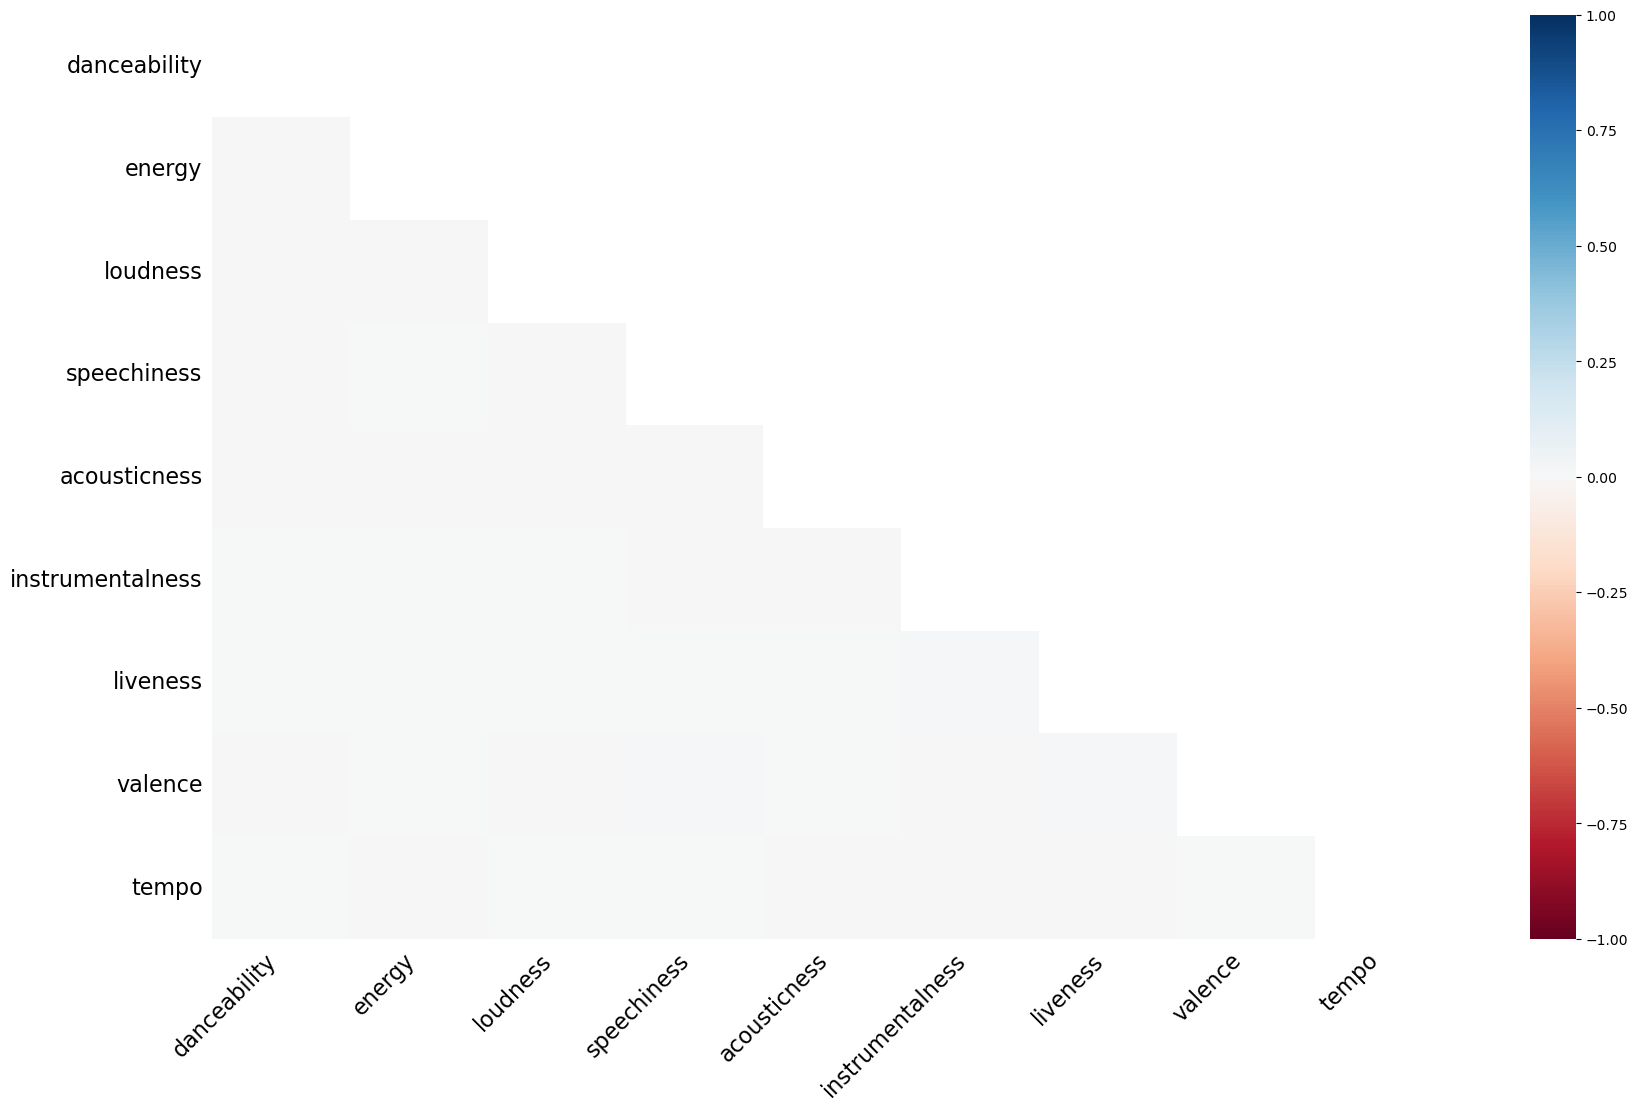

In [17]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [19]:
data.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.0724,NaN,0.3570,0.693,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.0794,NaN,0.1100,0.613,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,pop


In [20]:
data.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

In [21]:
# Write your code here. Add as many boxes as you need.
def impute(data,columns):
    imp = SimpleImputer(strategy='median')
    data_copy = data.copy()
    for c in columns:
        data_copy[c] = imp.fit_transform(data_copy[[c]])
    return data_copy

In [22]:
data = impute(data=data,columns=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo'])

In [23]:
data.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [25]:
input = data.copy()
input.drop(columns=['genre'],axis=1,inplace=True)

In [26]:
input.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036
1,0.726,0.721,-4.969,0.0373,0.0724,0.000016,0.3570,0.693,99.972
2,0.675,0.931,-3.432,0.0742,0.0794,0.000016,0.1100,0.613,124.008
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.978
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976


In [27]:
encoder = LabelEncoder()
data['genre'] = encoder.fit_transform(data[['genre']].astype(str).values.ravel())

In [28]:
target = data.copy()['genre']

In [29]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: genre, dtype: int32

In [30]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [32]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [35]:
# Write your code here. Add as many boxes as you need.
model = XGBClassifier(max_depth=5, min_child_weight=3, n_estimators=100, n_jobs=-1, learning_rate=0.1)
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

Use the trained model to make predictions for the test set.

In [37]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      1216
           1       0.46      0.39      0.42      1048
           2       0.34      0.28      0.31      1109
           3       0.38      0.36      0.37      1062
           4       0.55      0.60      0.57      1146
           5       0.57      0.68      0.62       986

    accuracy                           0.50      6567
   macro avg       0.49      0.50      0.49      6567
weighted avg       0.49      0.50      0.49      6567



Assess the performance of the model by using different classification metrics.

In [39]:
# Write your code here. Add as many boxes as you need.
from lightgbm import LGBMClassifier

clf = LGBMClassifier()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 26266, number of used features: 9
[LightGBM] [Info] Start training from score -1.694050
[LightGBM] [Info] Start training from score -1.855582
[LightGBM] [Info] Start training from score -1.787125
[LightGBM] [Info] Start training from score -1.793741
[LightGBM] [Info] Start training from score -1.742219
[LightGBM] [Info] Start training from score -1.890769
              precision    recall  f1-score   support

           0       0.63      0.64      0.64      1216
           1       0.47      0.38      0.42      1048
           2       0.34      0.31      0.32      1109
           3       0.38      0.35      0.36      1062
           4       0.54      0.60      0.57      1146

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [43]:
# Write your code here. Add as many boxes as you need.
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [45]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [47]:
# Write your code here. Add as many boxes as you need.
params = {
    'learning_rate' :[0.1,0.9,0.5],
    'colsample_bylevel': [0.6,0.7,0.8],
    'max_depth' :[10,8,15]
}
cv = GridSearchCV(estimator=model,param_grid=params,cv=5)
cv.fit(X_train, Y_train)
print("Best Parameters:", cv.best_params_)
best_knn = cv.best_estimator_
y_pred = best_knn.predict(X_test)
print("Test Accuracy:", classification_report(Y_test, y_pred))

Best Parameters: {'colsample_bylevel': 0.8, 'learning_rate': 0.1, 'max_depth': 10}
Test Accuracy:               precision    recall  f1-score   support

           0       0.64      0.62      0.63       617
           1       0.41      0.34      0.37       488
           2       0.33      0.33      0.33       555
           3       0.41      0.38      0.39       571
           4       0.50      0.59      0.54       580
           5       0.59      0.64      0.62       473

    accuracy                           0.49      3284
   macro avg       0.48      0.48      0.48      3284
weighted avg       0.48      0.49      0.48      3284



## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [49]:
# Write your code here. Add as many boxes as you need.